In [26]:
!pip install sweetviz


In [27]:
!pip install tpot

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
from tpot import TPOTClassifier
from sklearn.preprocessing import StandardScaler



In [29]:
train=pd.read_csv("/content/Train_dataset.csv")
test=pd.read_csv("/content/Test_dataset.csv")
df = pd.concat([train, test], ignore_index=True)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [31]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


                                             |          | [  0%]   00:00 -> (? left)


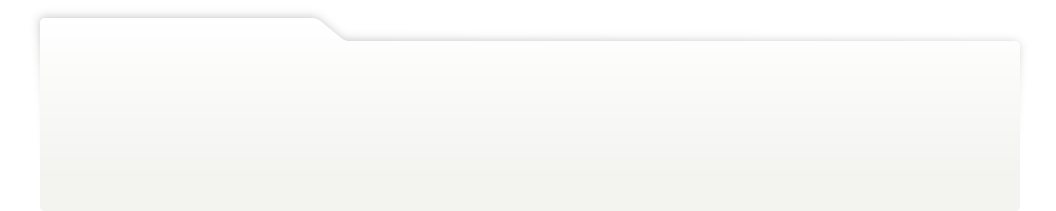
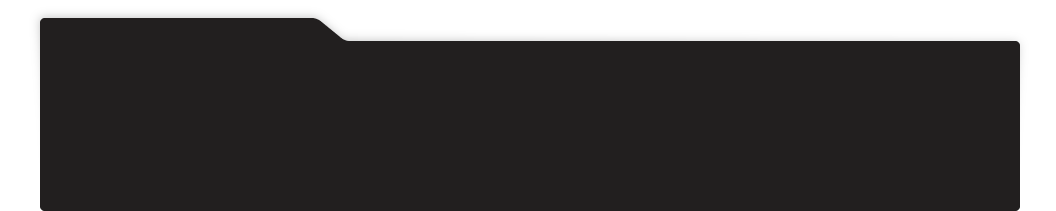
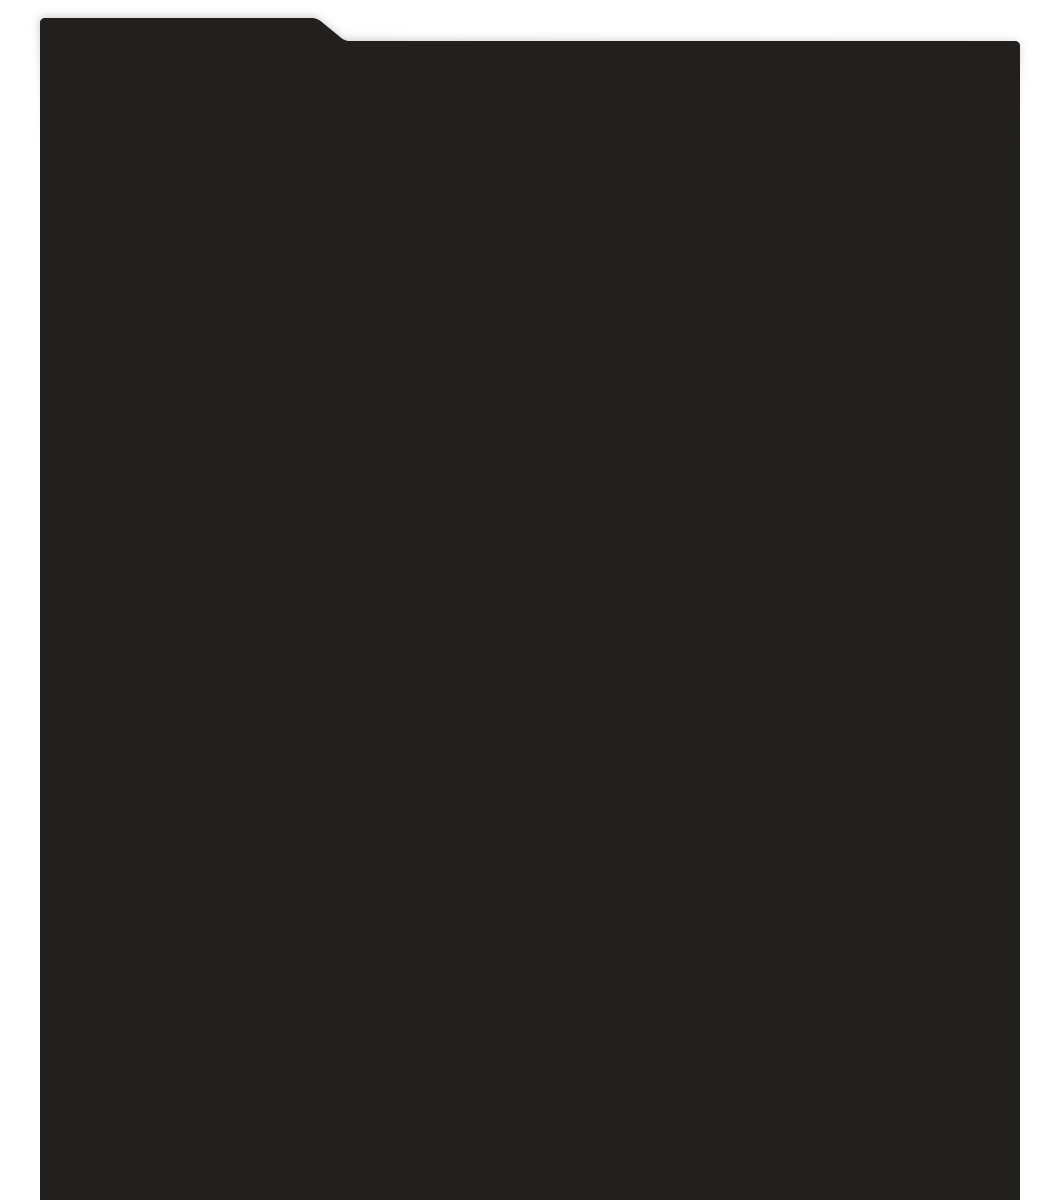
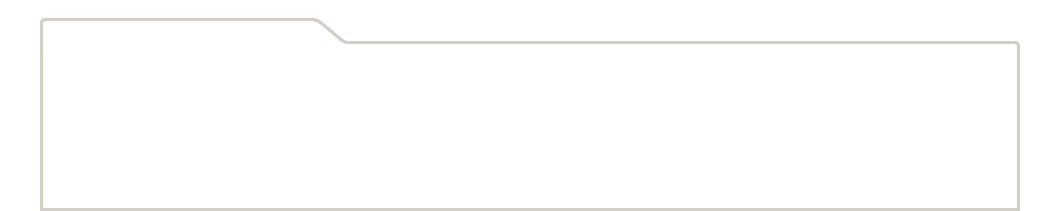
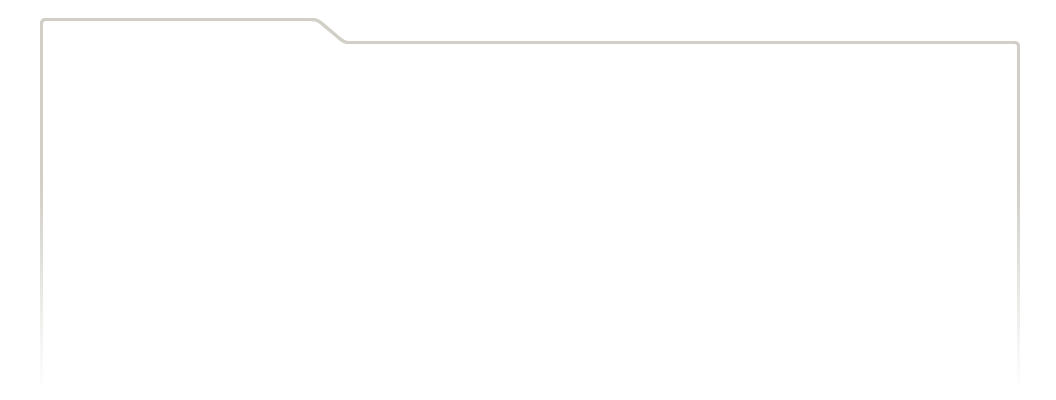
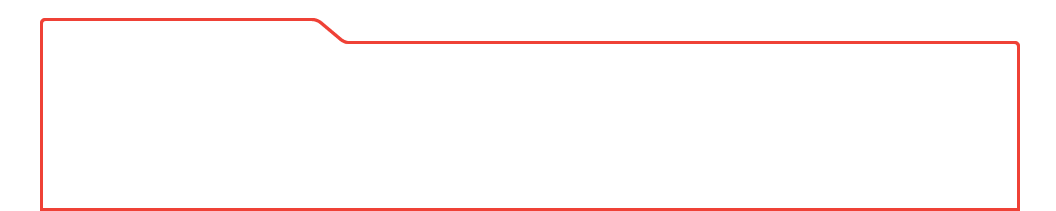
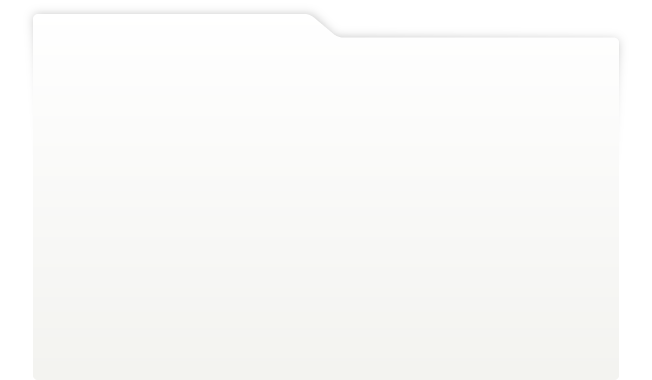
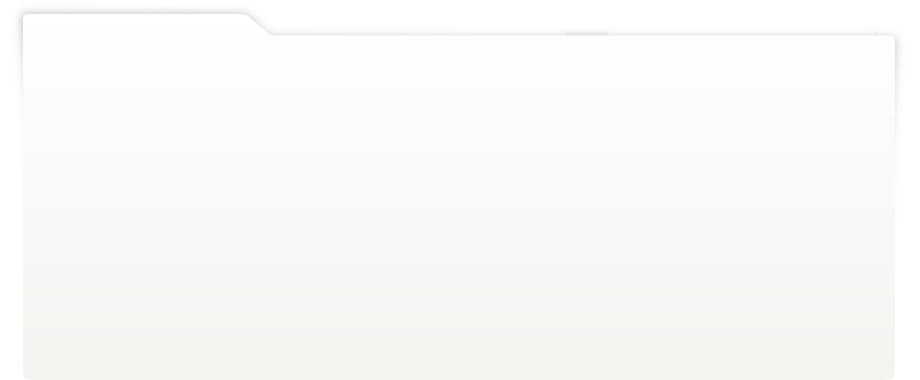
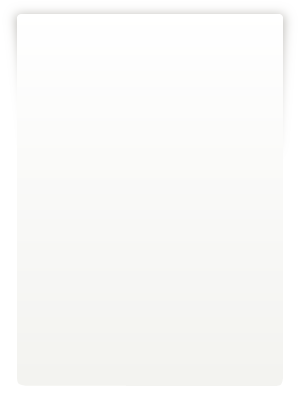
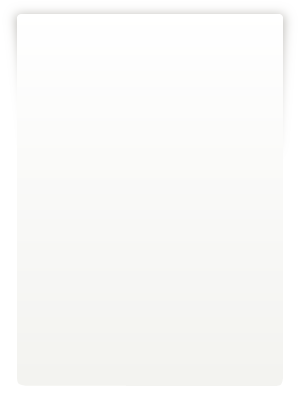
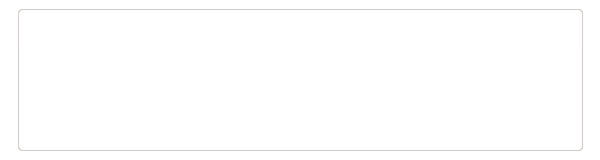
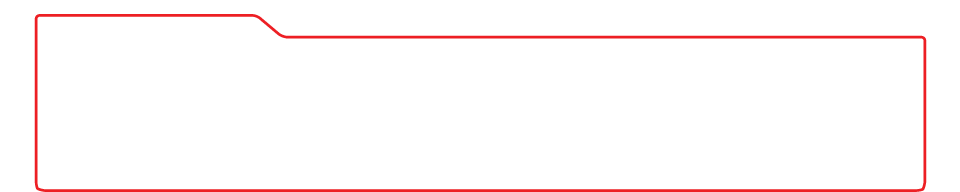
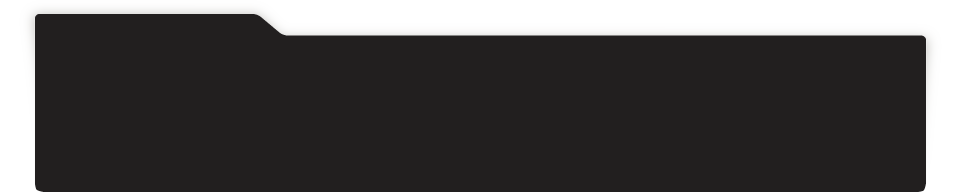
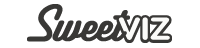
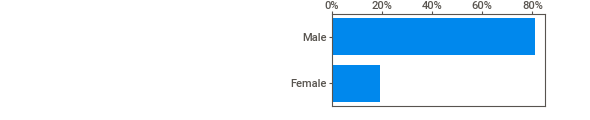
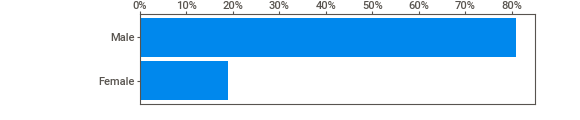
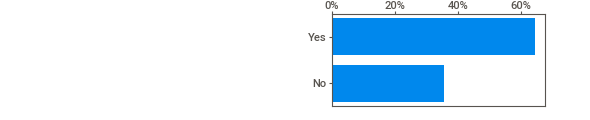
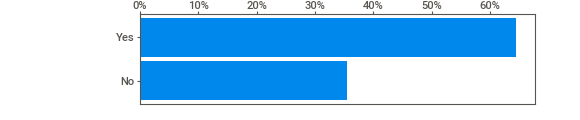
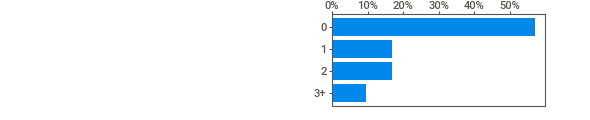
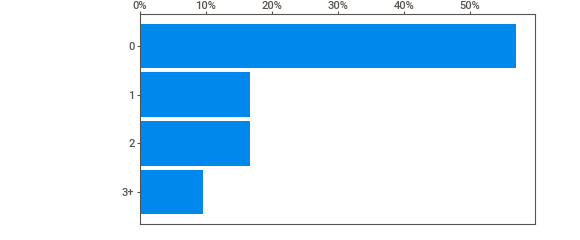
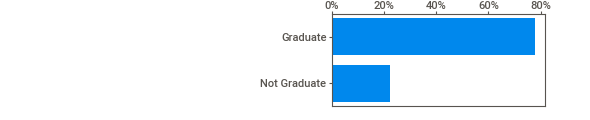
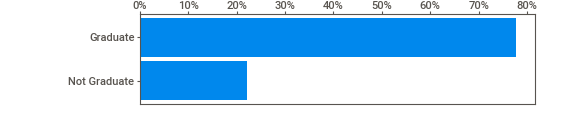
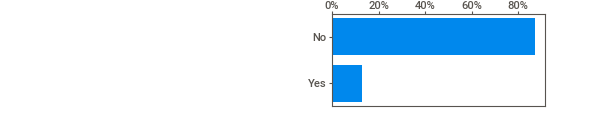
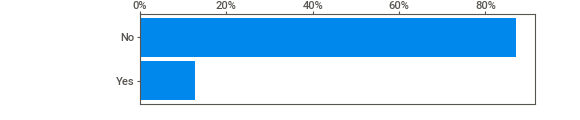
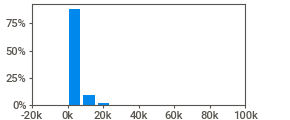
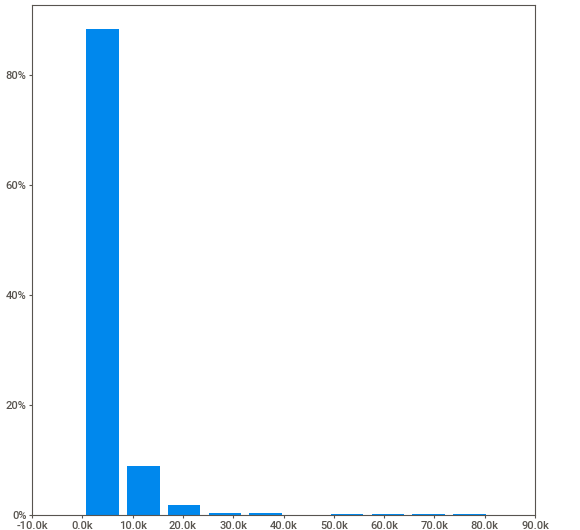
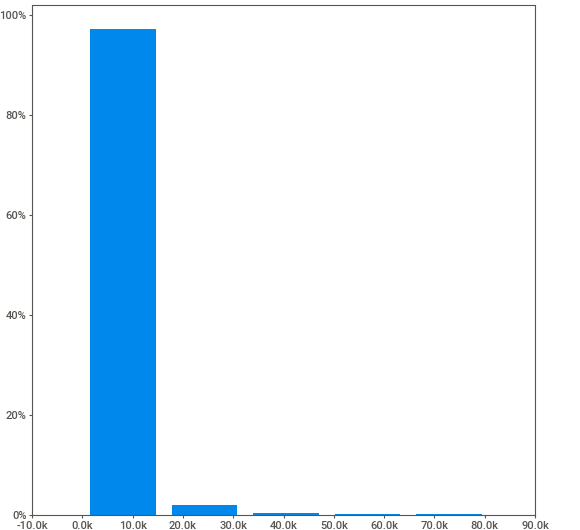
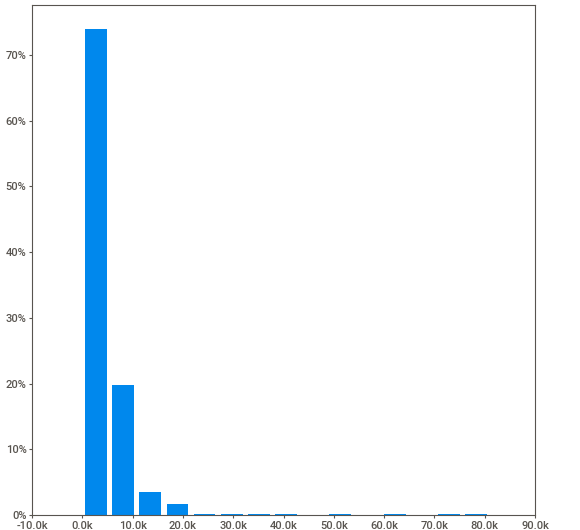
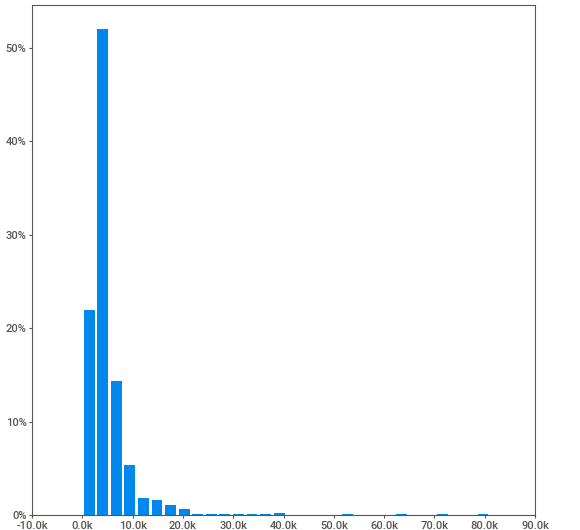
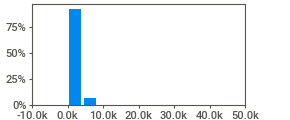
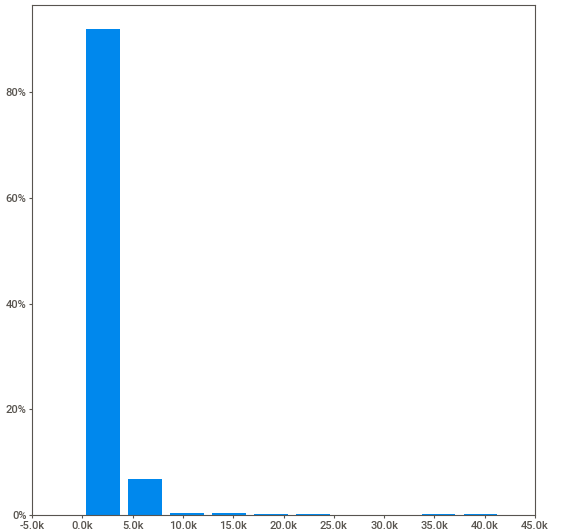
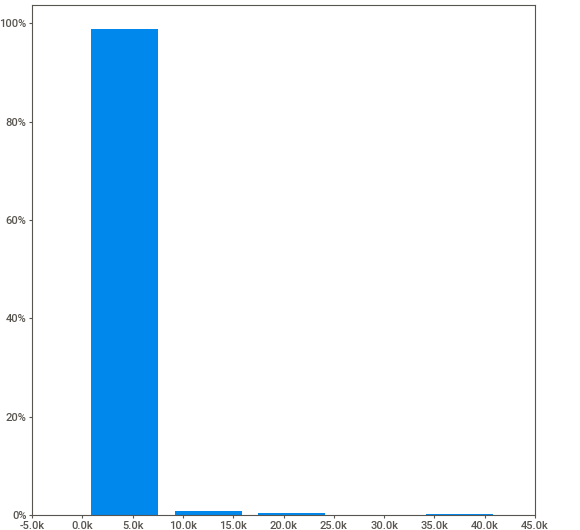
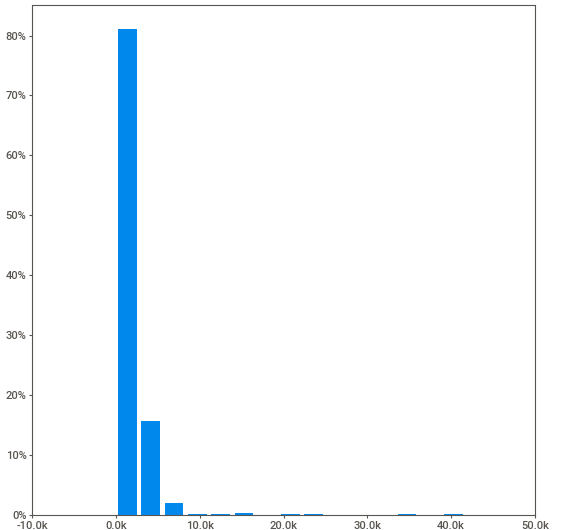
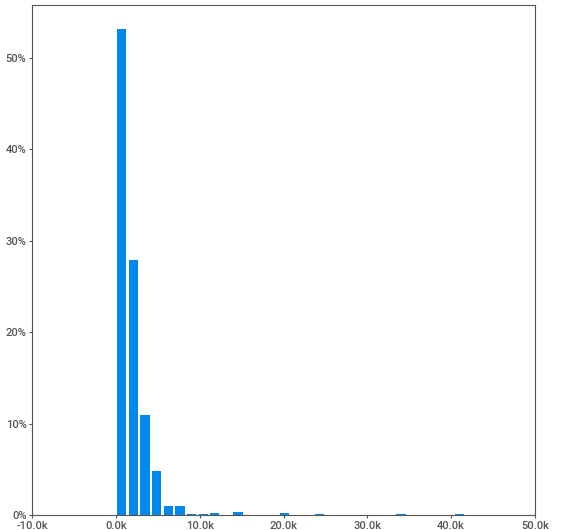
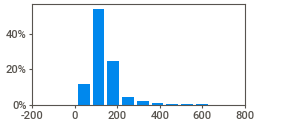
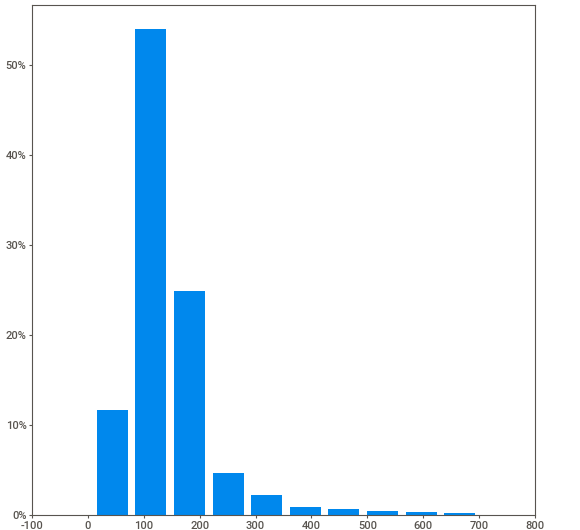
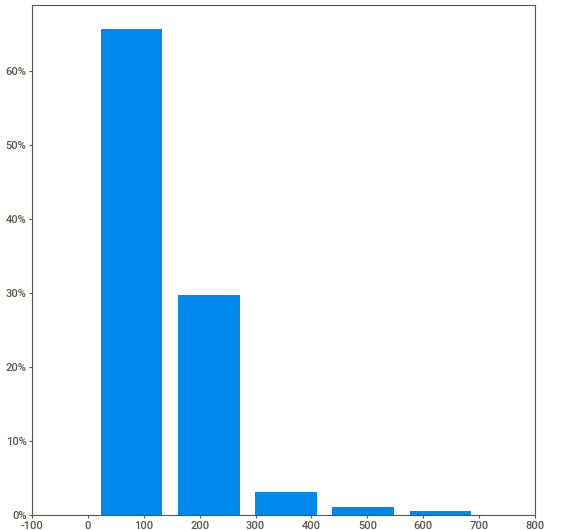
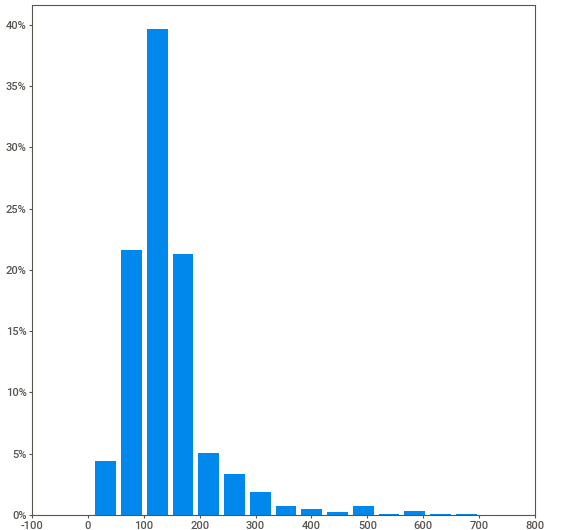
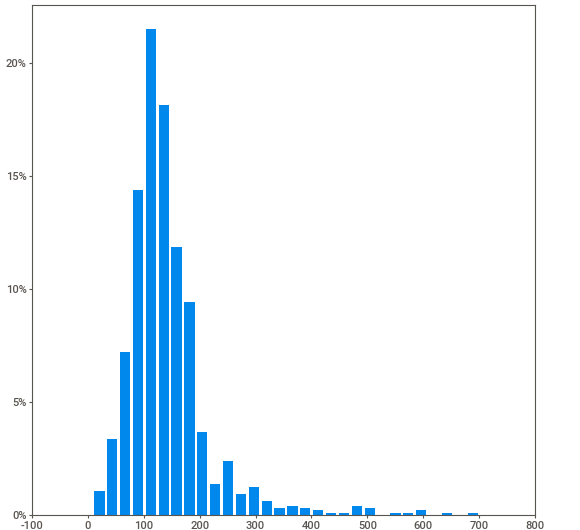
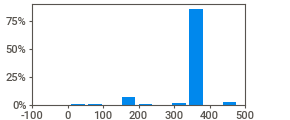
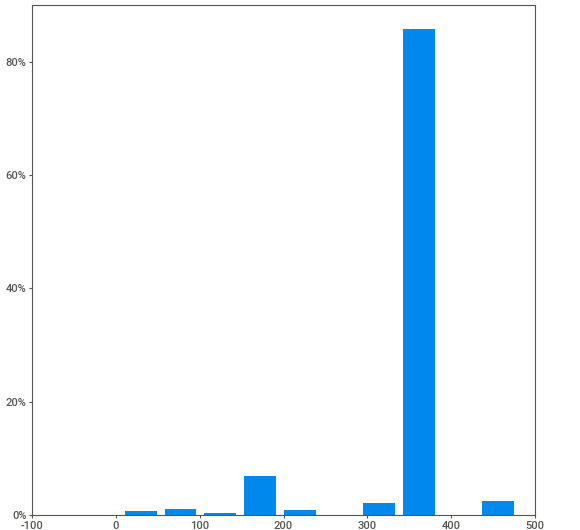
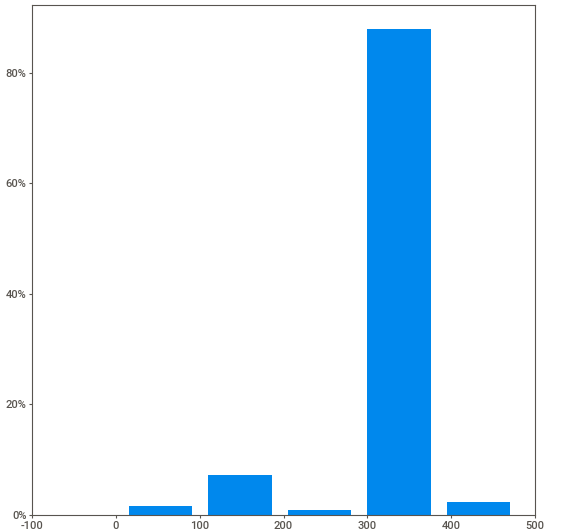
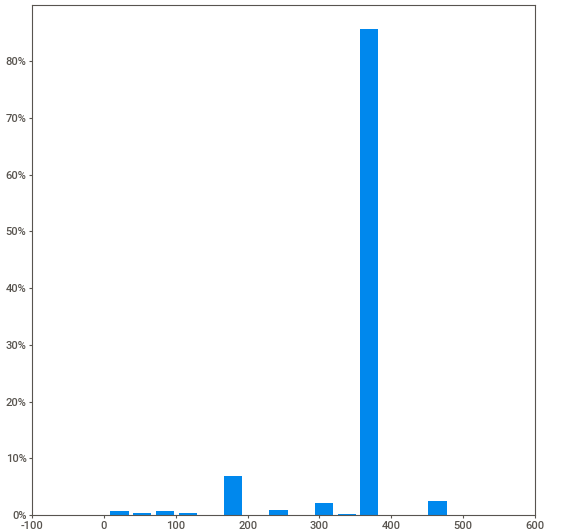
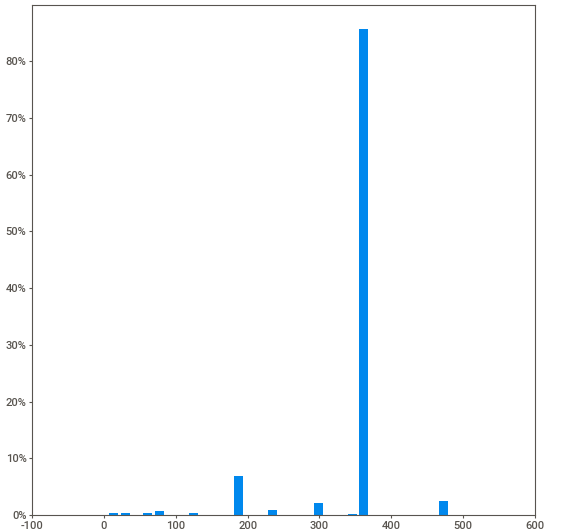
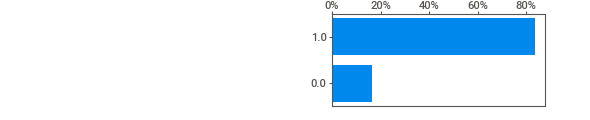
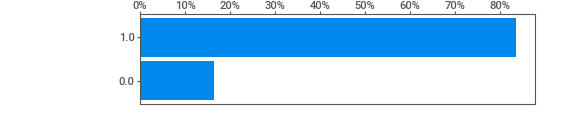
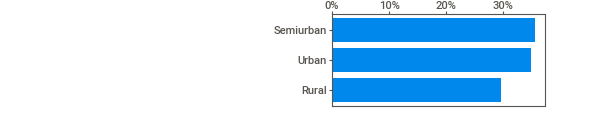
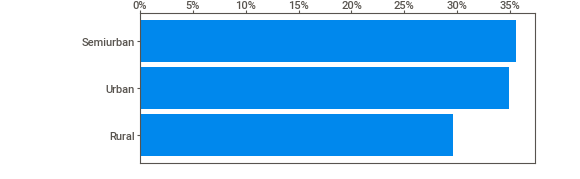
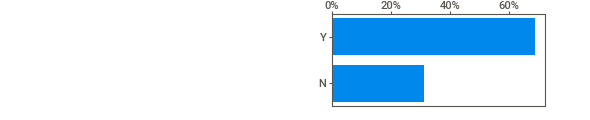
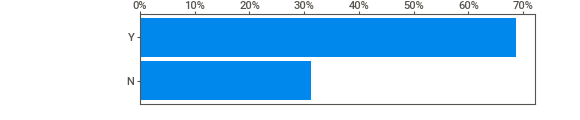
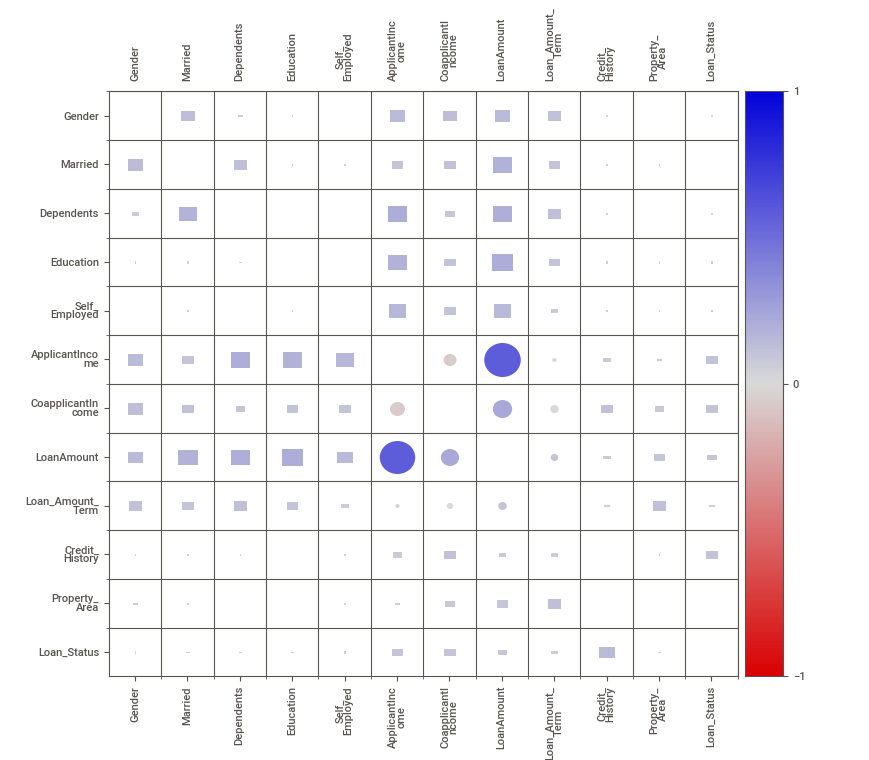
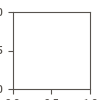

In [32]:
autoEDA = sweetviz.analyze(df)
autoEDA.show_notebook()

 **`CLEANING THE MODEL`**

In [33]:
categorical_cols = ['Gender', 'Married', 'Self_Employed']
for col in categorical_cols:
    df[col].fillna("Unknown", inplace=True)
df["Dependents"].fillna(df[col].mode()[0], inplace=True)

In [34]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_cols:
    df[col].fillna(0, inplace=True)
df.dropna(subset=['Loan_Status'], inplace=True)


In [35]:
print(df.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [36]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False])

**The Home Loans Department manager wants to know the following:**

An overview of the data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


What data quality issues exist in both train and test?




There were missing values in the columns:

* Gender
* Married
* Dependents
* Self_employed
* LoanAmount
* Loan_Amount_Term
* Credit_History
* Loan_Status

Gender, Married, Dependents, Self_Employed:

Since these are categorical variables, I:
Replaced missing values with the mode (the most frequent value) of each respective column.
Created a new category for missing values (e.g., 'Unknown')

LoanAmount, Loan_Amount_Term, Credit_History:

For numerical variables, I:
Replaced missing values with the mean of each respective column.

There were lot of missing values in Loan_Status column also, but as it was the target column instead of filling missing values which could cause error,I simply dropped the rows with missing values


 How do the the loan statuses compare? i.e. what is the distrubition of each?

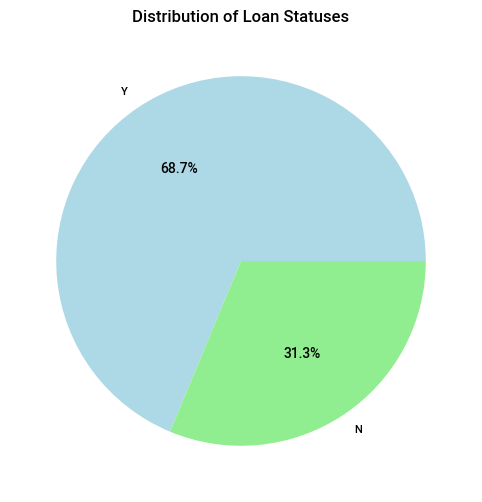

In [38]:
loan_status_counts = df['Loan_Status'].value_counts()
plt.figure(figsize=(8, 6))
loan_status_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of Loan Statuses')
plt.ylabel('')
plt.show()


How many of the loan applicants have dependents based on the historical dataset?

Loan applicants with dependents 269


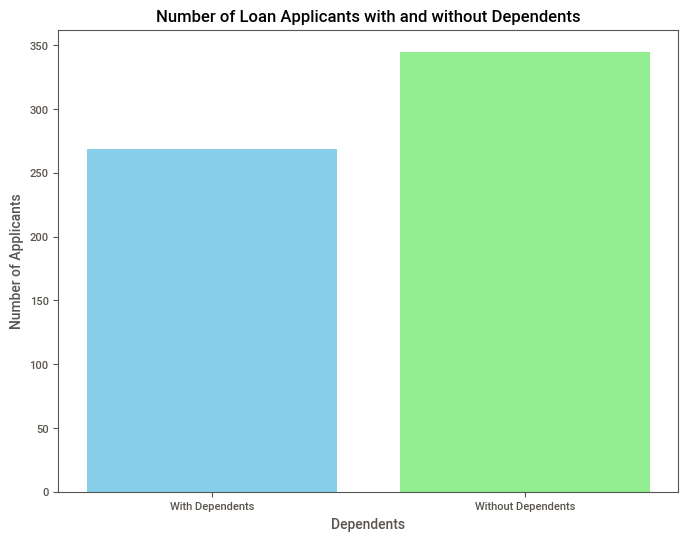

In [39]:
applicants_with_dependents = df[df['Dependents'] != "0"]
num_applicants_with_dependents = len(applicants_with_dependents)
print("Loan applicants with dependents",num_applicants_with_dependents)

applicants_without_dependents = df[df['Dependents'] == "0"]
num_applicants_without_dependents = len(applicants_without_dependents)

plt.figure(figsize=(8, 6))
plt.bar(['With Dependents', 'Without Dependents'], [num_applicants_with_dependents, num_applicants_without_dependents], color=['skyblue', 'lightgreen'])
plt.title('Number of Loan Applicants with and without Dependents')
plt.xlabel('Dependents')
plt.ylabel('Number of Applicants')
plt.show()


How do the incomes of those who are employed compare to those who are self employed based on the historical dataset?

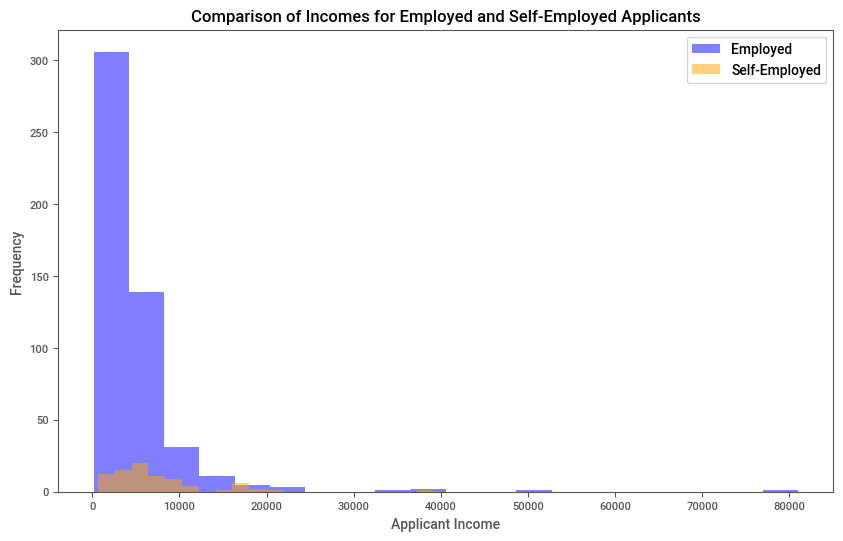

In [40]:
employed = df[df['Self_Employed'] == 'No']
self_employed = df[df['Self_Employed'] == 'Yes']

plt.figure(figsize=(10, 6))
plt.hist(employed['ApplicantIncome'], bins=20, alpha=0.5, label='Employed', color='blue')
plt.hist(self_employed['ApplicantIncome'], bins=20, alpha=0.5, label='Self-Employed', color='orange')
plt.title('Comparison of Incomes for Employed and Self-Employed Applicants')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Are applicants with a credit history more likely to default than those who do not have one?

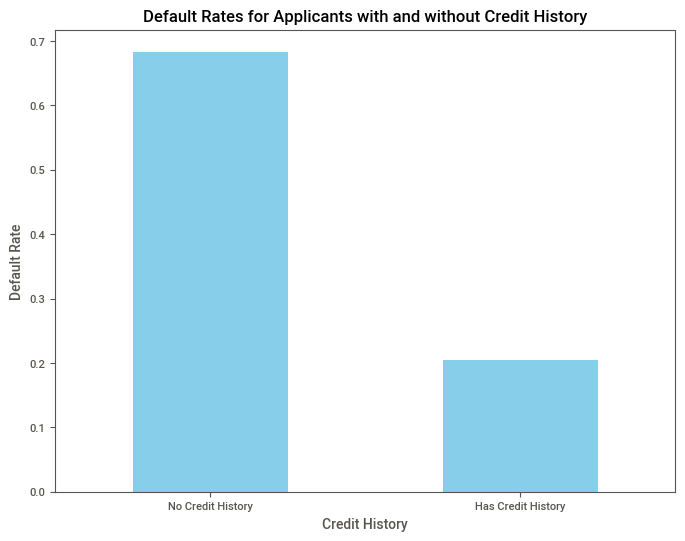

In [41]:
grouped_data = df.groupby('Credit_History')['Loan_Status']

default_rates = grouped_data.value_counts(normalize=True).unstack()
default_rates['default_rate'] = default_rates['N'] / (default_rates['N'] + default_rates['Y'])

plt.figure(figsize=(8, 6))
default_rates['default_rate'].plot(kind='bar', color='skyblue')
plt.title('Default Rates for Applicants with and without Credit History')
plt.xlabel('Credit History')
plt.ylabel('Default Rate')
plt.xticks(ticks=[0, 1], labels=['No Credit History', 'Has Credit History'], rotation=0)
plt.show()

Is there a correlation between the applicant's income and the loan amount they applied for?

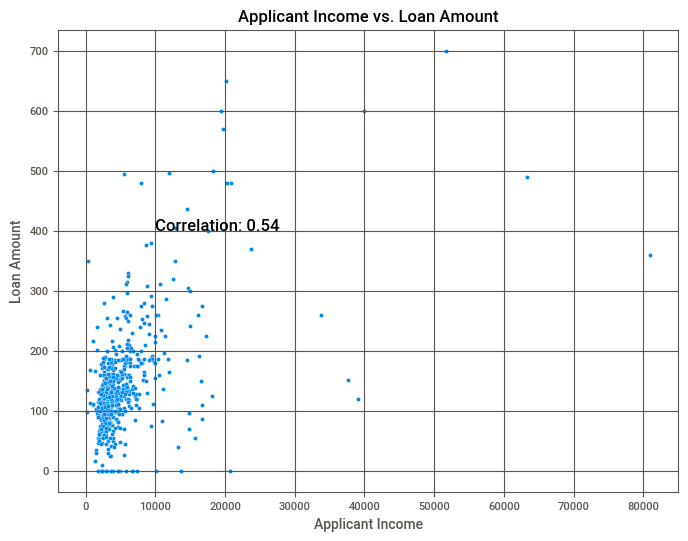

In [42]:
income_loan_df = df[['ApplicantIncome', 'LoanAmount']]

correlation = income_loan_df.corr().iloc[0, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=income_loan_df)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.text(x=10000, y=400, s=f'Correlation: {correlation:.2f}', fontsize=12)
plt.grid(True)
plt.show()

Feature engineering for Machine Learning Model

In [43]:
df.drop("Loan_ID",axis=1,inplace=True)
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Self_Employed', 'Dependents',"Education","Property_Area"])
df.head(20)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Gender_Unknown,Married_No,...,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_No,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0.0,360.0,1.0,1,False,True,False,True,...,True,False,False,False,False,True,False,False,False,True
1,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,3000,0.0,66.0,360.0,1.0,1,False,True,False,False,...,True,False,False,False,False,True,False,False,False,True
3,2583,2358.0,120.0,360.0,1.0,1,False,True,False,False,...,True,False,False,False,False,False,True,False,False,True
4,6000,0.0,141.0,360.0,1.0,1,False,True,False,True,...,True,False,False,False,False,True,False,False,False,True
5,5417,4196.0,267.0,360.0,1.0,1,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
6,2333,1516.0,95.0,360.0,1.0,1,False,True,False,False,...,True,False,False,False,False,False,True,False,False,True
7,3036,2504.0,158.0,360.0,0.0,0,False,True,False,False,...,False,False,False,True,False,True,False,False,True,False
8,4006,1526.0,168.0,360.0,1.0,1,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
9,12841,10968.0,349.0,360.0,1.0,0,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False


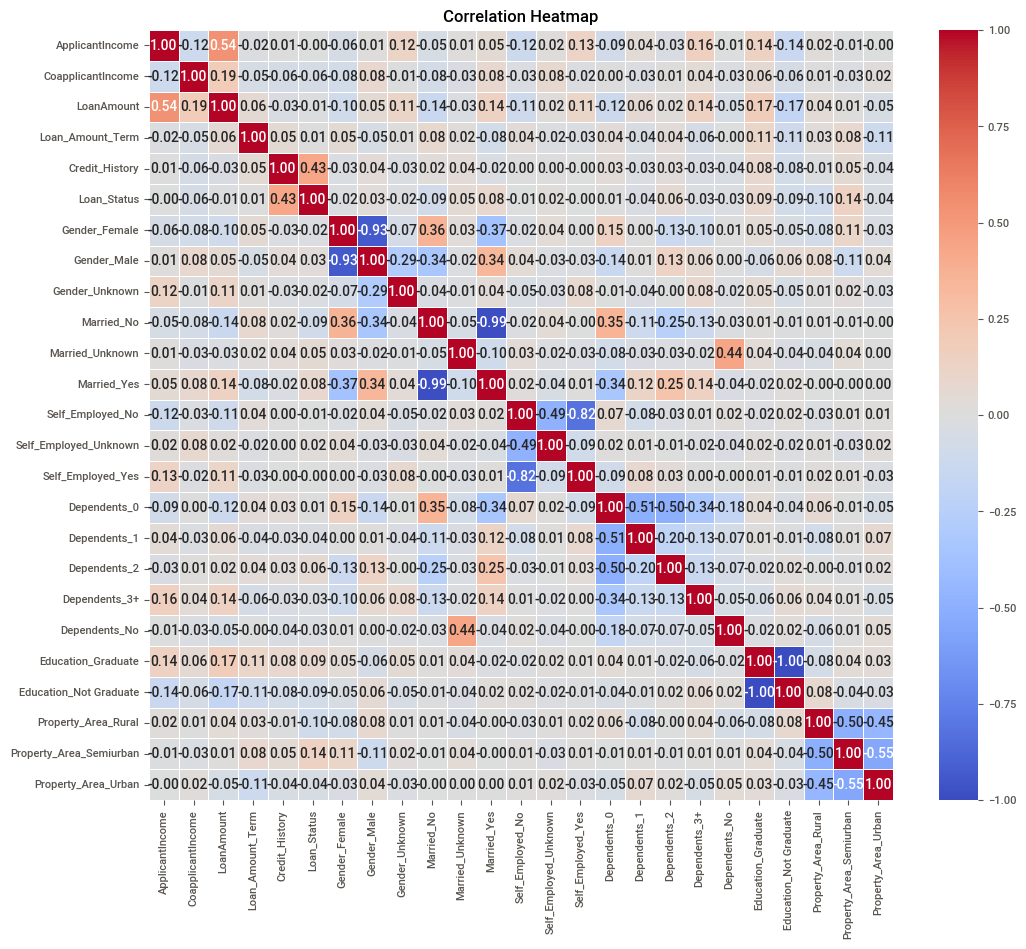

In [44]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Traditional machine learning model

In [45]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_classifier = LogisticRegression(C=0.1)
lr_classifier.fit(X_train_scaled, y_train)

lr_predictions = lr_classifier.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
print("Logistic Regression Confusion Matrix:")
print(lr_conf_matrix)


Logistic Regression Accuracy: 0.7560975609756098
Logistic Regression Confusion Matrix:
[[17 26]
 [ 4 76]]


In [51]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)

Decision Tree Accuracy: 0.6260162601626016
Decision Tree Confusion Matrix:
[[17 26]
 [20 60]]


Automated Machine Learning Model

In [52]:
tpot = TPOTClassifier(generations=5, population_size=20, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)

best_pipeline = tpot.fitted_pipeline_
tpot_predictions = best_pipeline.predict(X_test)
tpot_accuracy = accuracy_score(y_test, tpot_predictions)
print("TPOT AutoML Accuracy:", tpot_accuracy)

tpot_conf_matrix = confusion_matrix(y_test, tpot_predictions)
print("TPOT AutoML Confusion Matrix:")
print(tpot_conf_matrix)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7697175840032981

Generation 2 - Current best internal CV score: 0.7697175840032981

Generation 3 - Current best internal CV score: 0.7697175840032981

Generation 4 - Current best internal CV score: 0.7697175840032981

Generation 5 - Current best internal CV score: 0.7697175840032981

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=19, min_samples_split=5, n_estimators=100)
TPOT AutoML Accuracy: 0.7723577235772358
TPOT AutoML Confusion Matrix:
[[22 21]
 [ 7 73]]
